[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/ProjIntegrador_PO_IA/blob/main/kmeans_knn.ipynb)


# Projeto Integrador - Aplicações de Pesquisa Operacional e Inteligência Artificial

Prof: Diogo Ferreira de Lima Silva (TEP - UFF)

# Introdução

Nesta aula, veremos dois procedimentos baseados em distâncias. O primeiro, k-médias, é um algoritmo de **clustering**, classificado como um procedimentos de aprendizado **não supervisionado**. Já o segundo procedimento, o k-NN, consiste em um algoritmo de aprendizado **supervisionado** que efetua tarefas de **classificação**. 

- K-médias - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- K-NN - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Conjunto de dados


Trabalharemos com um conjunto de dados do Legathum Prosperity Index que avalia países com base em 12 indicadores socioeconômicos. Os dados estão armazenados em uma planilha Excel. Para realizar a leitura, utilizaremos a biblioteca Pandas.

In [1]:
import pandas as pd

In [2]:
# Leitura dos dados
url = 'https://raw.githubusercontent.com/diogoflim/ProjIntegrador_PO_IA/main/Dados/LegathumProsperityIndex.csv'

df = pd.read_csv(url, index_col=0, sep = ';')
df

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
Alternativa,,,,,,,,,,,,
Afghanistan,33.79,27.58,42.91,31.18,50.98,25.37,30.07,38.92,40.48,41.21,19.71,22.32
Albania,41.81,70.91,56.71,47.94,73.84,60.95,52.37,73.94,58.27,59.78,73.09,44.92
Algeria,37.83,61.87,44.44,39.64,72.47,48.77,37.95,76.62,44.89,39.56,75.23,47.04
Angola,31.44,27.70,33.34,33.81,50.29,31.62,22.79,42.35,50.50,40.18,61.39,44.11
Argentina,36.14,71.40,46.95,55.93,77.19,54.35,53.46,80.64,58.57,77.57,70.43,51.26
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,27.48,61.67,19.88,12.41,70.48,38.96,27.89,68.82,57.61,40.63,41.40,44.20
Vietnam,58.06,66.64,54.55,44.33,76.48,62.96,44.92,71.84,52.71,40.10,67.71,63.94
Yemen,26.05,28.72,34.39,17.41,57.02,28.35,27.49,44.57,45.34,22.95,26.48,41.20


Podemos inicialmente explorar o conjunto de dados com algumas estatísticas. Utilizaremos inicialmente o método describe. Em seguida, Vamos plotar alguns histogramas.

In [3]:
df.describe()

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,49.728084,58.935509,55.017365,50.576587,68.850479,54.259641,53.245928,68.934910,55.570299,57.493293,67.208982,52.722455
std,13.283210,19.396275,14.080335,19.024834,11.156941,18.378276,15.506687,19.877394,8.825607,18.229007,17.520125,9.021113
min,22.680000,15.300000,19.880000,12.410000,32.810000,18.270000,22.510000,21.120000,33.670000,19.290000,16.000000,22.320000
25%,39.610000,44.225000,45.965000,37.720000,60.240000,37.315000,40.240000,53.300000,49.840000,42.400000,58.730000,47.280000
50%,48.030000,61.870000,54.390000,46.160000,72.330000,56.820000,52.340000,74.450000,55.030000,57.880000,68.550000,51.930000
75%,59.940000,74.175000,64.600000,61.565000,77.090000,70.560000,63.915000,85.580000,60.380000,69.820000,80.330000,57.275000
max,79.270000,91.270000,87.480000,91.040000,86.630000,87.960000,86.430000,96.180000,77.980000,94.090000,95.750000,77.240000


In [4]:
# Vamos utilizar a biblioteca referência em python para plotar gráficos

import matplotlib.pyplot as plt

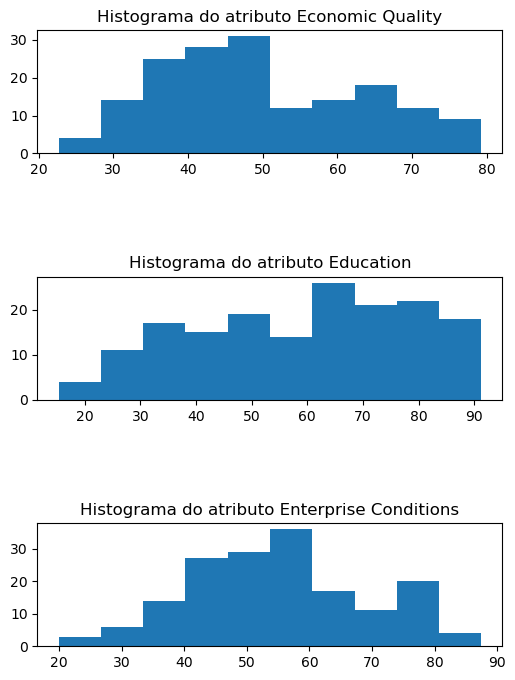

In [5]:
plt.figure(1 , figsize = (6 , 8))
n = 0 
for atributo in ['Economic Quality',	'Education',	'Enterprise Conditions']:
    n += 1
    plt.subplot(3 , 1 , n)
    plt.subplots_adjust(hspace = 1 , wspace = 1)
    plt.hist(df[atributo])
    plt.title('Histograma do atributo {}'.format(atributo))

plt.show()

In [6]:
# Exercício: Repita o procedimento acima escolhendo outros atributos

## Prodecimentos de Normalização

Em algoritmos baseados em distância, assim como em outros modelos de Aprendizado de Máquina, é comum efetuar algumas etapas de pré-processamento de dados. Uma dessas etapas é a normalização da matriz de atributos.


A normalização de dados refere-se ao processo de escalar os atributos de um conjunto de dados de forma que eles estejam dentro de um intervalo específico, como [0, 1] ou [-1, 1]. 

Isso pode ser feito de várias maneiras, e o scikit-learn fornece duas abordagens comuns: 
- Min-Max Scaling
- Z-score Standardization.


Min-Max Scaling, também conhecido como normalização intervalar [0, 1], é uma técnica que redimensiona os valores de um atributo para que fiquem dentro do intervalo especificado. 

A fórmula para Min-Max Scaling é dada por:

$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

Onde:

- X: Valor original do atributo
- $X_{\text{min}}$: Valor mínimo do atributo no conjunto de dados
- $X_{\text{max}}$: Valor máximo do atributo no conjunto de dados


Por sua vez, a Z-score Standardization, também conhecida como padronização, transforma os valores de uma característica para que tenham uma média de 0 e um desvio padrão de 1. 

A fórmula para Z-score Standardization é dada por:

$$X_{\text{scaled}} = \frac{X - \mu}{\sigma}$$

Onde:
- X: Valor original do atributo
- $\mu$: Média do atributo no conjunto de dados
- $\sigma$:Desvio padrão do atributo no conjunto de dados


In [7]:
# Importando os métodos
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
# Instanciando os procedimentos
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Realizando as transformações
df_minmax = min_max_scaler.fit_transform(df)
df_standardized = standard_scaler.fit_transform(df)

# Passando os dados normalizados para DataFrames
df_minmax = pd.DataFrame(df_minmax, columns=df.columns, index = df.index)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns, index = df.index)

In [9]:
df_minmax

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
Alternativa,,,,,,,,,,,,
Afghanistan,0.196324,0.161643,0.340680,0.238713,0.337607,0.101880,0.118273,0.237144,0.153690,0.293048,0.046520,0.000000
Albania,0.338046,0.731999,0.544822,0.451863,0.762356,0.612426,0.467146,0.703704,0.555179,0.541310,0.715862,0.411508
Algeria,0.267715,0.613005,0.363314,0.346305,0.736901,0.437652,0.241552,0.739408,0.253216,0.270989,0.742696,0.450109
Angola,0.154798,0.163222,0.199112,0.272161,0.324786,0.191563,0.004380,0.282840,0.379824,0.279278,0.569154,0.396759
Argentina,0.237851,0.738449,0.400444,0.553478,0.824601,0.517721,0.484199,0.792966,0.561950,0.779144,0.682508,0.526948
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.084821,0.610373,0.000000,0.000000,0.699926,0.296886,0.084168,0.635492,0.540284,0.285294,0.318495,0.398398
Vietnam,0.625199,0.675793,0.512870,0.405952,0.811408,0.641268,0.350594,0.675726,0.429700,0.278209,0.648401,0.757830
Yemen,0.059551,0.176649,0.214645,0.063589,0.449833,0.144641,0.077910,0.312417,0.263372,0.048930,0.131411,0.343773


In [10]:
df_standardized

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
Alternativa,,,,,,,,,,,,
Afghanistan,-1.203476,-1.621436,-0.862464,-1.022607,-1.606554,-1.576673,-1.499071,-1.514544,-1.714974,-0.895949,-2.719264,-3.380280
Albania,-0.597890,0.619217,0.120574,-0.139003,0.448557,0.365131,-0.056657,0.252555,0.306814,0.125821,0.336682,-0.867512
Algeria,-0.898417,0.151746,-0.753475,-0.576587,0.325394,-0.299601,-0.989375,0.387787,-1.213789,-0.986737,0.459194,-0.631801
Angola,-1.380923,-1.615230,-1.544179,-0.883951,-1.668585,-1.235575,-1.969958,-1.341467,-0.576226,-0.952623,-0.333130,-0.957571
Argentina,-1.026028,0.644556,-0.574676,0.282237,0.749722,0.004931,0.013847,0.590635,0.340908,1.104673,0.184400,-0.162602
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-1.679940,0.141404,-2.502997,-2.012179,0.146494,-0.834989,-1.640079,-0.005798,0.231807,-0.927862,-1.477535,-0.947564
Vietnam,0.629138,0.398410,-0.033293,-0.329326,0.685893,0.474828,-0.538540,0.146590,-0.325066,-0.957024,0.028683,1.247217
Yemen,-1.787919,-1.562485,-1.469383,-1.748574,-1.063558,-1.414037,-1.665952,-1.229446,-1.162647,-1.900662,-2.331689,-1.281118


## Aplicando o k-médias

Utilizaremos os dados normalizados com o procedimento intervalar. Para a aplicação do k-médias, basta utilizarmos o procedimento da biblioteca sklearn.

In [11]:
from sklearn.cluster import KMeans

k = 3 # Faremos o teste com 3 clusters

# Instanciando o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustando o modelo aos dados normalizados
kmeans.fit(df_minmax)

# Adicionando os rótulos de cluster aos dados originais
df['Cluster Labels'] = kmeans.labels_

In [12]:
df

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital,Cluster Labels
Alternativa,,,,,,,,,,,,,
Afghanistan,33.79,27.58,42.91,31.18,50.98,25.37,30.07,38.92,40.48,41.21,19.71,22.32,1
Albania,41.81,70.91,56.71,47.94,73.84,60.95,52.37,73.94,58.27,59.78,73.09,44.92,2
Algeria,37.83,61.87,44.44,39.64,72.47,48.77,37.95,76.62,44.89,39.56,75.23,47.04,2
Angola,31.44,27.70,33.34,33.81,50.29,31.62,22.79,42.35,50.50,40.18,61.39,44.11,1
Argentina,36.14,71.40,46.95,55.93,77.19,54.35,53.46,80.64,58.57,77.57,70.43,51.26,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,27.48,61.67,19.88,12.41,70.48,38.96,27.89,68.82,57.61,40.63,41.40,44.20,1
Vietnam,58.06,66.64,54.55,44.33,76.48,62.96,44.92,71.84,52.71,40.10,67.71,63.94,2
Yemen,26.05,28.72,34.39,17.41,57.02,28.35,27.49,44.57,45.34,22.95,26.48,41.20,1


É comum no uso do k-means que testemos qual a quantidade ideal de clusters. 

Para isso, procedimentos comuns são:
- Curva do cotovelo;
- Curva da silhueta;

Vejamos o funcionamento da curva do cotovelo, onde testaremos valores de $k$ de 1 a 10 e calcularemos a inércia para cada um. 

Em seguida, a curva do cotovelo será plotada para visualizarmos a tendência. 

O valor de k ideal será aquele em que a curva começa a se achatar, formando um "cotovelo". Assim, escolhemos um valor de k que corresponda ao ponto onde a inércia começa a diminuir a uma taxa menor.

In [13]:
inertia = []
for k in range(1, 11):  # Teste valores de k de 1 a 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_minmax)
    inertia.append(kmeans.inertia_)

# Plote a curva do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Curva do Cotovelo para Escolha de k')
plt.grid(True)
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

## Aplicando o k-NN

Como o k-NN consiste em um procedimento de Aprendizado Supervisionado, trabalhamos com a presença de rótulos para os exemplos de treinamento.

Para efeitos ilustrativos, vamos aproveitar nesse momento os rótulos atribuídos na clusterização do k-médias. Lembre que adicionamos uma coluna com o rótulo o nosso DataFrame df.

In [ ]:
# Imprimindo as três últimas colunas
df.iloc[:, -3:]

Inicialmente, vamos separar o DataFrame em uma matriz de atributos "X" e um vetor de rótulos "y"

In [ ]:
import numpy as np

In [ ]:
X = np.array(df.drop(columns = ["Cluster Labels"]))
y = np.array(df["Cluster Labels"])

In [ ]:
#Matriz de Atributos
X

In [ ]:
# Vetor de rótulos
y

In [ ]:
# Normalizando a matriz de atributos.

X = MinMaxScaler().fit_transform(X)

## Amostragem


Ao aplicar um modelo de aprendizado de máquina, é importante que utilizemos alguma técnica de amostragem. Por exemplo, no tradicional procedimento holdout, separamos os dados em dois conjuntos:

- Conjunto de treinamento: onde treinaremos o algoritmo de aprendizado;
- Conjunto de teste: onde testaremos o modelo aprendido e verificaremos a performance.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Agora que os dados foram separados, vamos treinar nosso algoritmo nos dados de treinamento:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_vizinhos = 3 # Número de vizinhos que utilizaremos inicialmente
knn_classifier = KNeighborsClassifier(n_neighbors = k_vizinhos) #Instanciando o modelo
knn_classifier.fit(X_train, y_train) # Treinando o modelo

Agora, podemos aplicar o algoritmo treinado nos dados de teste para realizar previsões das classes!

In [ ]:
y_pred = knn_classifier.predict(X_test)

y_pred

Vamos medir a acurácia atingida pelo nosso modelo:

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(y_test, y_pred)
print(f"A acurácia obtida no conjunto de teste foi: {acuracia:.4f}")

Nosso modelo previu corretamente todo o conjunto treinado, atingindo uma acurácia de 100%.

Perceba que isso não necessariamente ocorre. Pode ter sido ao acaso. Vamos refazer nosso experimento com uma outra semente aleatória na separação dos conjunto de treinamento e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


k_vizinhos = 3
knn_classifier = KNeighborsClassifier(n_neighbors = k_vizinhos)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f"A acurácia obtida no conjunto de teste foi: {acuracia:.4f}")

**Agora nossa acurácia foi de apenas 91,18%**

## Validação Cruzada

Para minimizar os efeitos problemáticos da amostragem Holdout, podemos partir para uma outra técnica de amostragem. Vejamos a técnica cross validation.


1. Divisão dos dados: Inicialmente, o conjunto de dados é dividido em duas partes: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de teste é reservado para avaliar o desempenho do modelo.

2. Iteração: No procedimento de validação cruzada, essa divisão em treinamento e teste é repetida várias vezes, chamadas "fold" ou dobras. Cada vez, uma parte diferente do conjunto de dados é usada como conjunto de teste, enquanto o restante é usado como conjunto de treinamento. Por exemplo, em uma validação cruzada de 5-fold, o conjunto de dados é dividido em 5 partes iguais, e o processo é repetido 5 vezes.

3. Treinamento e Avaliação: Durante cada iteração, um modelo é treinado no conjunto de treinamento e avaliado no conjunto de teste. As métricas de desempenho, como a precisão, podem ser registradas para cada iteração.

4. Cálculo das Métricas Finais: Após todas as iterações, as métricas de desempenho (por exemplo, precisão média) são calculadas a partir das métricas registradas em cada dobra. Isso fornece uma estimativa mais confiável do desempenho do modelo em dados não vistos.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# validação cruzada 5-fold
num_folds = 5
acuracias_obtidas = cross_val_score(knn_classifier, X, y, cv=num_folds)


for i, score in enumerate(acuracias_obtidas):
    print(f"Fold {i + 1}: Acurácia = {score:.4f}")

# Calculando a acurácia média
acuracia_media = np.mean(acuracias_obtidas)
print(f"Acurácia Média Obtida no Experimento: {acuracia_media:.4f}")

De maneira geral, o nosso procedimento obteve bons resuldados, com uma acurácia média de 97,02%.

É importante lembrar que nesse teste utilizamos rótulos vindos do procedimento k-means. Isso não é usual. Normalmente, os rótulos são considerados respostas, por exemplo, atribuídas por um especialista. 

Um exemplo seria o diagnóstico (rótulos) históricos atribuídos por médicos de um hospotal a pacientes que chegam com determinados sintomes (matriz de atributos). 